## Hoja de trabajo 7: SVM

### Javier Valle, 20159
### Roberto Ríos, 20979

In [23]:
# Imports necesarios.
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

### 1. Use los mismos conjuntos de entrenamiento y prueba de las hojas de trabajo pasadas para probar el algoritmo.

Clasificación:  0       1
1       0
2       1
3       0
4       1
       ..
1455    0
1456    1
1457    1
1458    0
1459    0
Name: Clasificacion, Length: 1460, dtype: int64
Precisión: 1.0
OverallCond:  0       5
1       8
2       5
3       5
4       5
       ..
1455    5
1456    6
1457    9
1458    6
1459    6
Name: OverallCond, Length: 1460, dtype: int64
Precisión: 0.639269406392694
Predicción: [5 5 5 6 5 8 5 5 5 5 5 5 5 5 5 5 5 5 8 7 5 5 5 8 5 6 5 5 5 5 5 5 6 5 5 5 5
 5 5 5 6 5 5 5 5 5 8 5 5 7 5 5 5 5 5 5 7 5 5 6 7 5 7 5 5 5 7 5 7 5 5 6 5 5
 6 5 5 5 5 7 5 7 7 5 7 5 5 5 5 5 5 5 5 5 5 5 5 6 7 7 5 5 7 5 7 7 5 6 5 7 7
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 7 5 5 5 5 7 5 8 5 5 7 5 8 5 7
 5 5 5 5 5 6 6 5 8 5 5 5 5 5 5 5 5 7 7 5 5 5 5 5 5 5 6 7 7 6 5 5 6 6 5 5 6
 5 5 5 5 5 5 7 5 5 7 5 5 7 6 6 5 5 6 5 7 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 5 5
 7 7 5 5 5 7 7 5 5 7 5 5 5 7 5 7 5 6 5 5 5 5 6 5 5 5 7 5 8 5 6 5 5 5 8 5 5
 5 5 5 6 8 5 5 6 5 7 5 7 7 5 7 6 5 5 7 5 5 5 5 5 5 5 5 5 5 5 5 5 7 5 5 7 5


[Text(0.5431034482758621, 0.9, '5 <= 1983.5\ngini = 0.639\nsamples = 1022\nvalue = [1, 5, 17, 45, 564, 187, 137, 52, 14]'),
 Text(0.27586206896551724, 0.7, '5 <= 1983.5\ngini = 0.776\nsamples = 615\nvalue = [1, 4, 17, 45, 180, 174, 130, 51, 13]'),
 Text(0.13793103448275862, 0.5, '5 <= 0.5\ngini = 0.715\nsamples = 431\nvalue = [1, 4, 16, 39, 169, 139, 56, 7, 0]'),
 Text(0.06896551724137931, 0.3, '5 <= 0.5\ngini = 0.673\nsamples = 84\nvalue = [0, 1, 1, 7, 17, 41, 17, 0, 0]'),
 Text(0.034482758620689655, 0.1, 'gini = 0.612\nsamples = 68\nvalue = [0, 0, 0, 5, 15, 38, 10, 0, 0]'),
 Text(0.10344827586206896, 0.1, 'gini = 0.734\nsamples = 16\nvalue = [0, 1, 1, 2, 2, 3, 7, 0, 0]'),
 Text(0.20689655172413793, 0.3, '5 <= 1959.5\ngini = 0.705\nsamples = 347\nvalue = [1, 3, 15, 32, 152, 98, 39, 7, 0]'),
 Text(0.1724137931034483, 0.1, 'gini = 0.778\nsamples = 162\nvalue = [1, 3, 10, 26, 50, 45, 22, 5, 0]'),
 Text(0.2413793103448276, 0.1, 'gini = 0.604\nsamples = 185\nvalue = [0, 0, 5, 6, 102, 53, 1

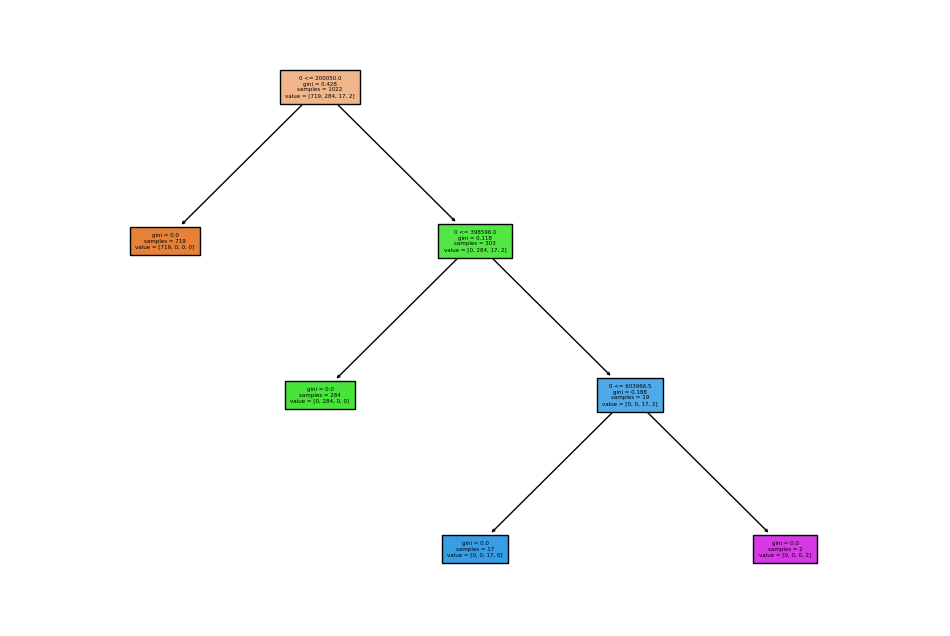

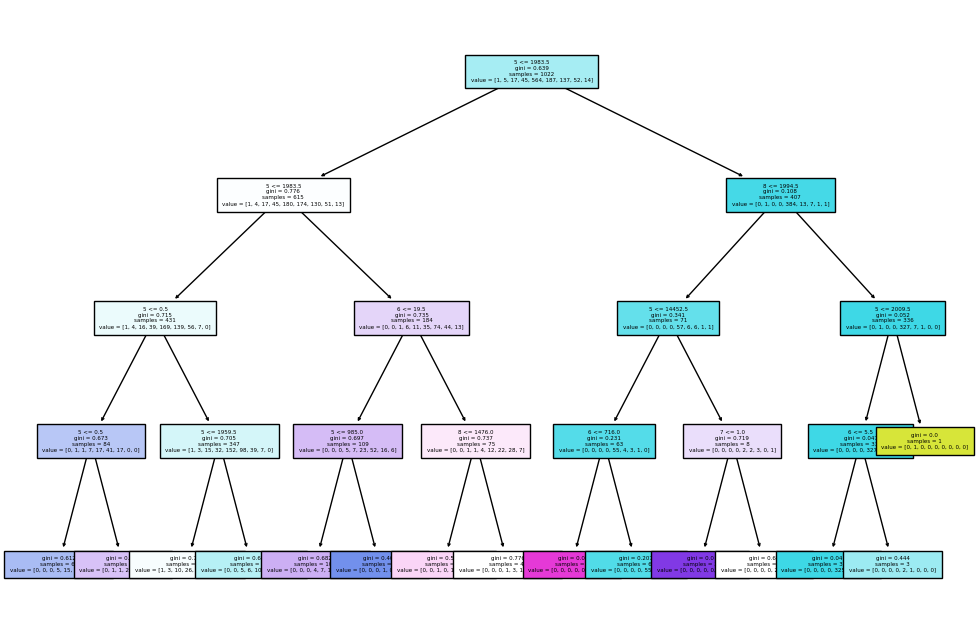

In [2]:

# Conjuntos de entrenamiento y prueba de la Hoja 5.

# Abriendo el archivo clasficado.
datos = pd.read_csv('archivo_clasificado.csv')

# Limpieza de datos.
datos = datos.replace(to_replace='',value=0)
datos = datos.fillna(0)
cat = datos.select_dtypes(include=['object']).columns.to_list()
num = datos.select_dtypes(include=['number']).columns.to_list()

# Pasando todo a un Dataframe.
x = pd.DataFrame()
x[num] = datos[num]
x[cat] = datos[cat].apply(lambda x: pd.factorize(x)[0])
res = 'Clasificacion'
X = x.drop(res, axis=1)
y = datos[res]

# Imprimiendo la clasificación.
print("Clasificación: ", y)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Crea un clasificador de árbol de decisión
clf = tree.DecisionTreeClassifier( max_depth=4 )

# Entrena el clasificador en el conjunto de entrenamiento
clf.fit(X_train, y_train)

# # Accurancy.
print("Precisión:", clf.score(X_test, y_test))

fig, ax = plt.subplots(figsize=(12, 8))
tree.plot_tree(clf, fontsize=4, feature_names=y, filled=True)

# Abriendo el archivo clasficado.
datos = pd.read_csv('archivo_clasificado.csv')

# Limpieza de datos.
datos = datos.replace(to_replace='',value=0)
datos = datos.fillna(0)
cat = datos.select_dtypes(include=['object']).columns.to_list()
num = datos.select_dtypes(include=['number']).columns.to_list()

# Pasando todo a un Dataframe.
x = pd.DataFrame()
x[num] = datos[num]
x[cat] = datos[cat].apply(lambda x: pd.factorize(x)[0])
res = 'OverallCond'
X = x.drop(res, axis=1)
y = datos[res]

# Imprimiendo la clasificación.
print("OverallCond: ", y)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Crea un clasificador de árbol de decisión
clf = tree.DecisionTreeClassifier( max_depth=4 )

# Entrena el clasificador en el conjunto de entrenamiento
clf.fit(X_train, y_train)


# Accurancy.
print("Precisión:", clf.score(X_test, y_test))

# Haciendo una predicción.
y_pred = clf.predict(X_test)

print("Predicción:", y_pred)

fig, ax = plt.subplots(figsize=(12, 8))
tree.plot_tree(clf, fontsize=4, feature_names=y, filled=True)

### 2. Explore los datos y explique las transformaciones que debe hacerle para generar un modelo de máquinas vectoriales de soporte. 

In [3]:
# Abriendo el archivo.
datos = pd.read_csv("archivo_clasificado.csv")


# Quitando los na del dataset.
datos = datos.replace(to_replace='',value=0)
datos = datos.fillna(0)

# Obteniendo las columnas categóricas y las numéricas.
cat = datos.select_dtypes(include=['object']).columns.to_list()
num = datos.select_dtypes(include=['number']).columns.to_list()

# Limpieza de datos.
print(datos.info())
print(datos.describe())
print(datos.isna().sum())


# # Imprimiendo la clasificación.
# print("Variables numéricas")
# print(x[num])
# print("Variables categóricas")
# print(x[cat])
#print("Clasificación: ", y)

# Pasando todo a un Dataframe.
x = pd.DataFrame()
x[num] = datos[num]
x[cat] = datos[cat].apply(lambda x: pd.factorize(x.astype('category'))[0])

# Imprimiendo el df.
#print(x)

cat= pd.get_dummies(datos, columns=["SaleCondition"])
print(cat)

# Imprimiendo las columnas que hay en el dataset
#print("Columnas: ", x.columns)

# Imprimiendo la clasificación.
#print("Clasificación: ", y)

# Imprimiendo las columnas que hay en el dataset
#print("Columnas: ", datos.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 83 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##### Las tranformaciones que se le deben hacer al hacer dataset es llenar los na del dataset por números enteros, de preferencia 0, seleccionar una variable categórica para describir de una mejor manera los resultados a generar, seleccionar los datos de entrenamiento y prueba, que en este caso serían el precio de la casa y su clasificación.

### 3. Use como variable respuesta la variable categórica que especifica si la casa es barata, media o cara

In [4]:
# Abriendo el archivo.
datos = pd.read_csv("archivo_clasificado.csv")

# Quitando los na del dataset.
datos = datos.replace(to_replace='',value=0)
datos = datos.fillna(0)

datos

# Usando como variable de respuesta la variable categórica que especifica si la casa es barata, media o cara.
res = "Clasificacion"

datos[res]

0       1
1       0
2       1
3       0
4       1
       ..
1455    0
1456    1
1457    1
1458    0
1459    0
Name: Clasificacion, Length: 1460, dtype: int64

### 4. Genere varios (más de 2) modelos de SVM con diferentes kernels y distintos valores en los parámetros c, gamma (circular) y d (en caso de que utilice el polinomial). Puede tunear el modelo de forma automática siempre que explique los resultados.

In [21]:
# Cargar datos desde archivo CSV
datos = pd.read_csv("archivo_clasificado.csv")

res = 'Clasificacion'
X = x.drop(res, axis=1)
y = datos[res]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Entrenar varios modelos SVM con diferentes kernels y valores de los parámetros c y gamma
kernels = ['linear', 'rbf', 'poly']
c_values = [0.1, 1, 10]
gamma_values = [0.1, 1, 10]

best_acc = 0
best_model = None

for kernel in kernels: # Usando diferentes kernels.
    for c in c_values:
        if kernel == 'linear': # Kernel lineal.
            model = SVC(kernel=kernel, C=c)
        else:
            for gamma in gamma_values:
                if kernel == 'rbf':  # Kernel radial.
                    model = SVC(kernel=kernel, C=c, gamma=gamma)
                elif kernel == 'poly': # Kernel polinómico.
                    for d in range(1, 6): # Generando los modelos.
                        model = SVC(kernel=kernel, C=c, gamma=gamma, degree=d)
                        model.fit(X_train, y_train)
                        acc = model.score(X_test, y_test)
                        if acc > best_acc: # Guardando el mejor modelo.
                            best_acc = acc
                            best_model = model

# Evaluar la precisión de cada modelo en el conjunto de prueba
print("Mejor precisión en el conjunto de prueba:", best_acc)

# # Hacer predicciones en nuevos datos usando el modelo seleccionado
# new_data = sc.transform(X_train)
# new_datas = sc.transform(new_data)
# predictions = best_model.predict(new_datas)
# print(predictions)

Mejor precisión en el conjunto de prueba: 0.9726027397260274


### 4. Use los modelos para predecir el valor de la variable respuesta

In [22]:
# Cargar datos desde archivo CSV
datos = pd.read_csv("archivo_clasificado.csv")

res = 'Clasificacion'
X = x.drop(res, axis=1)
y = datos[res]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Entrenar varios modelos SVM con diferentes kernels y valores de los parámetros c y gamma
kernels = ['linear', 'rbf', 'poly']
c_values = [0.1, 1, 10]
gamma_values = [0.1, 1, 10]

best_acc = 0
best_model = None

for kernel in kernels: # Usando diferentes kernels.
    for c in c_values:
        if kernel == 'linear': # Kernel lineal.
            model = SVC(kernel=kernel, C=c)
        else:
            for gamma in gamma_values:
                if kernel == 'rbf':  # Kernel radial.
                    model = SVC(kernel=kernel, C=c, gamma=gamma)
                elif kernel == 'poly': # Kernel polinómico.
                    for d in range(1, 6): # Generando los modelos.
                        model = SVC(kernel=kernel, C=c, gamma=gamma, degree=d)
                        model.fit(X_train, y_train)
                        acc = model.score(X_test, y_test)
                        if acc > best_acc: # Guardando el mejor modelo.
                            best_acc = acc
                            best_model = model

# Evaluar la precisión de cada modelo en el conjunto de prueba
print("Mejor precisión en el conjunto de prueba:", best_acc)

# Hacer predicciones en nuevos datos usando el modelo seleccionado
new_data = sc.transform(X_train)
new_datas = sc.transform(new_data)
predictions = best_model.predict(new_datas)
print(predictions)

Mejor precisión en el conjunto de prueba: 0.9726027397260274
[3 3 3 ... 3 3 3]


C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### 6. Haga las matrices de confusión respectivas. 

In [ ]:
# Cargar datos desde archivo CSV
datos = pd.read_csv("archivo_clasificado.csv")

res = 'Clasificacion'
X = x.drop(res, axis=1)
y = datos[res]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Entrenar varios modelos SVM con diferentes kernels y valores de los parámetros c y gamma
kernels = ['linear', 'rbf', 'poly']
c_values = [0.1, 1, 10]
gamma_values = [0.1, 1, 10]

best_acc = 0
best_model = None

for kernel in kernels: # Usando diferentes kernels.
    for c in c_values:
        if kernel == 'linear': # Kernel lineal.
            model = SVC(kernel=kernel, C=c)
        else:
            for gamma in gamma_values:
                if kernel == 'rbf':  # Kernel radial.
                    model = SVC(kernel=kernel, C=c, gamma=gamma)
                elif kernel == 'poly': # Kernel polinómico.
                    for d in range(1, 6): # Generando los modelos.
                        model = SVC(kernel=kernel, C=c, gamma=gamma, degree=d)
                        model.fit(X_train, y_train)
                        acc = model.score(X_test, y_test)
                        if acc > best_acc: # Guardando el mejor modelo.
                            best_acc = acc
                            best_model = model

# Evaluar la precisión de cada modelo en el conjunto de prueba
print("Mejor precisión en el conjunto de prueba:", best_acc)

# Hacer predicciones en nuevos datos usando el modelo seleccionado
new_data = sc.transform(X_train)
new_datas = sc.transform(new_data)
predictions = best_model.predict(new_datas)
#print(predictions)

# Haciendo la matriz de confusión
new_data = sc.transform(X_test)
new_datas = sc.transform(new_data)
test_predictions = best_model.predict(new_datas)
print("Predicciones para el conjunto de prueba:")
print(test_predictions)
print("Matriz de confusión para el conjunto de prueba:")
print(confusion_matrix(y_test, test_predictions))